In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import sklearn.impute as imputer
sns.set_theme()
%matplotlib inline

### Data cleaning
Data downloaded from the site is very messy. Loaded data are all as objects, there is no capitalization, some redundant data. This part of a notebook aims to clean it to make it feasible to analyse. First cell is long but is just setting the dictionary that is used to map the region, using subregion data that was extracted from site

In [2]:
powiat_map = {
'aleksandrowski':'wojewodztwo',
'augustowski':'kujawsko-pomorskie',
'bartoszycki':'podlaskie',
'belchatowski':'warminsko-mazurskie',
'bedzinski':'lodzkie',
'bialski':'slaskie',
'biala podlaska':'lubelskie',
'bialobrzeski':'lubelskie',
'bialogardzki':'mazowieckie',
'bialostocki':'zachodniopomorskie',
'bialystok':'podlaskie',
'bielski':'podlaskie',
'bielski':'slaskie',
'bielsko-biala':'podlaskie',
'bierunsko-ledzinski':'slaskie',
'bieszczadzki':'slaskie',
'bilgorajski':'podkarpackie',
'bochenski':'lubelskie',
'boleslawiecki':'malopolskie',
'braniewski':'dolnoslaskie',
'brodnicki':'warminsko-mazurskie',
'brzeski':'kujawsko-pomorskie',
'brzeski':'malopolskie',
'brzezinski':'opolskie',
'brzozowski':'lodzkie',
'buski':'podkarpackie',
'bydgoski':'swietokrzyskie',
'bydgoszcz':'kujawsko-pomorskie',
'bytom':'kujawsko-pomorskie',
'bytowski':'slaskie',
'chelm':'pomorskie',
'chelminski':'lubelskie',
'chelmski':'kujawsko-pomorskie',
'chodzieski':'lubelskie',
'chojnicki':'wielkopolskie',
'chorzow':'pomorskie',
'choszczenski':'slaskie',
'chrzanowski':'zachodniopomorskie',
'ciechanowski':'malopolskie',
'cieszynski':'mazowieckie',
'czarnkowsko-trzcianecki':'slaskie',
'czestochowa':'wielkopolskie',
'czestochowski':'slaskie',
'czluchowski':'slaskie',
'dabrowa gornicza':'pomorskie',
'dabrowski':'slaskie',
'debicki':'malopolskie',
'drawski':'podkarpackie',
'dzialdowski':'zachodniopomorskie',
'dzierzoniowski':'warminsko-mazurskie',
'elblag':'dolnoslaskie',
'elblaski':'warminsko-mazurskie',
'elcki':'warminsko-mazurskie',
'garwolinski':'warminsko-mazurskie',
'gdansk':'mazowieckie',
'gdanski':'pomorskie',
'gdynia':'pomorskie',
'gizycki':'pomorskie',
'gliwice':'warminsko-mazurskie',
'gliwicki':'slaskie',
'glogowski':'slaskie',
'glubczycki':'dolnoslaskie',
'gnieznienski':'opolskie',
'goleniowski':'wielkopolskie',
'golubsko-dobrzynski':'zachodniopomorskie',
'goldapski':'kujawsko-pomorskie',
'gorlicki':'warminsko-mazurskie',
'gorzowski':'malopolskie',
'gorzow wielkopolski':'lubuskie',
'gostyninski':'lubuskie',
'gostynski':'mazowieckie',
'gorowski':'wielkopolskie',
'grajewski':'dolnoslaskie',
'grodziski':'podlaskie',
'grodziski':'mazowieckie',
'grojecki':'wielkopolskie',
'grudziadz':'mazowieckie',
'grudziadzki':'kujawsko-pomorskie',
'gryficki':'kujawsko-pomorskie',
'gryfinski':'zachodniopomorskie',
'hajnowski':'zachodniopomorskie',
'hrubieszowski':'podlaskie',
'ilawski':'lubelskie',
'inowroclawski':'warminsko-mazurskie',
'janowski':'kujawsko-pomorskie',
'jarocinski':'lubelskie',
'jaroslawski':'wielkopolskie',
'jasielski':'podkarpackie',
'jastrzebie-zdroj':'podkarpackie',
'jaworski':'slaskie',
'jaworzno':'dolnoslaskie',
'jelenia gora':'slaskie',
'jedrzejowski':'dolnoslaskie',
'kaliski':'swietokrzyskie',
'kalisz':'wielkopolskie',
'kamiennogorski':'wielkopolskie',
'kamienski':'dolnoslaskie',
'karkonoski[d]':'zachodniopomorskie',
'kartuski':'dolnoslaskie',
'katowice':'pomorskie',
'kazimierski':'slaskie',
'kedzierzynsko-kozielski':'swietokrzyskie',
'kepinski':'opolskie',
'ketrzynski':'wielkopolskie',
'kielce':'warminsko-mazurskie',
'kielecki':'swietokrzyskie',
'kluczborski':'swietokrzyskie',
'klobucki':'opolskie',
'klodzki':'slaskie',
'kolbuszowski':'dolnoslaskie',
'kolnenski':'podkarpackie',
'kolski':'podlaskie',
'kolobrzeski':'wielkopolskie',
'konecki':'zachodniopomorskie',
'konin':'swietokrzyskie',
'koninski':'wielkopolskie',
'koszalin':'wielkopolskie',
'koszalinski':'zachodniopomorskie',
'koscianski':'zachodniopomorskie',
'koscierski':'wielkopolskie',
'kozienicki':'pomorskie',
'krakowski':'mazowieckie',
'krakow':'malopolskie',
'krapkowicki':'malopolskie',
'krasnostawski':'opolskie',
'krasnicki':'lubelskie',
'krosno':'lubelskie',
'krosnienski':'podkarpackie',
'krosnienski':'podkarpackie',
'krotoszynski':'lubuskie',
'kutnowski':'wielkopolskie',
'kwidzynski':'lodzkie',
'legionowski':'pomorskie',
'legnica':'mazowieckie',
'legnicki':'dolnoslaskie',
'leski':'dolnoslaskie',
'leszczynski':'podkarpackie',
'leszno':'wielkopolskie',
'lezajski':'wielkopolskie',
'leborski':'podkarpackie',
'lidzbarski':'pomorskie',
'limanowski':'warminsko-mazurskie',
'lipnowski':'malopolskie',
'lipski':'kujawsko-pomorskie',
'lubaczowski':'mazowieckie',
'lubanski':'podkarpackie',
'lubartowski':'dolnoslaskie',
'lubelski':'lubelskie',
'lubinski':'lubelskie',
'lublin':'dolnoslaskie',
'lubliniecki':'lubelskie',
'lwowecki':'slaskie',
'lancucki':'dolnoslaskie',
'laski':'podkarpackie',
'leczycki':'lodzkie',
'leczynski':'lodzkie',
'lobeski':'lubelskie',
'lomza':'zachodniopomorskie',
'lomzynski':'podlaskie',
'losicki':'podlaskie',
'lowicki':'mazowieckie',
'lodzki wschodni':'lodzkie',
'lodz':'lodzkie',
'lukowski':'lodzkie',
'makowski':'lubelskie',
'malborski':'mazowieckie',
'miechowski':'pomorskie',
'mielecki':'malopolskie',
'miedzychodzki':'podkarpackie',
'miedzyrzecki':'wielkopolskie',
'mikolowski':'lubuskie',
'milicki':'slaskie',
'minski':'dolnoslaskie',
'mlawski':'mazowieckie',
'mogilenski':'mazowieckie',
'moniecki':'kujawsko-pomorskie',
'mragowski':'podlaskie',
'myslowice':'warminsko-mazurskie',
'myszkowski':'slaskie',
'myslenicki':'slaskie',
'mysliborski':'malopolskie',
'nakielski':'zachodniopomorskie',
'namyslowski':'kujawsko-pomorskie',
'nidzicki':'opolskie',
'nizanski':'warminsko-mazurskie',
'nowodworski':'podkarpackie',
'nowodworski':'pomorskie',
'nowomiejski':'mazowieckie',
'nowosadecki':'warminsko-mazurskie',
'nowosolski':'malopolskie',
'nowotarski':'lubuskie',
'nowotomyski':'malopolskie',
'nowy sacz':'wielkopolskie',
'nyski':'malopolskie',
'obornicki':'opolskie',
'olecki':'wielkopolskie',
'oleski':'warminsko-mazurskie',
'olesnicki':'opolskie',
'olkuski':'dolnoslaskie',
'olsztyn':'malopolskie',
'olsztynski':'warminsko-mazurskie',
'olawski':'warminsko-mazurskie',
'opatowski':'dolnoslaskie',
'opoczynski':'swietokrzyskie',
'opole':'lodzkie',
'opolski':'opolskie',
'opolski':'lubelskie',
'ostrolecki':'opolskie',
'ostroleka':'mazowieckie',
'ostrowiecki':'mazowieckie',
'ostrowski':'swietokrzyskie',
'ostrowski':'wielkopolskie',
'ostrodzki':'mazowieckie',
'ostrzeszowski':'warminsko-mazurskie',
'oswiecimski':'wielkopolskie',
'otwocki':'malopolskie',
'pabianicki':'mazowieckie',
'pajeczanski':'lodzkie',
'parczewski':'lodzkie',
'piaseczynski':'lubelskie',
'piekary slaskie':'mazowieckie',
'pilski':'slaskie',
'pinczowski':'wielkopolskie',
'piotrkowski':'swietokrzyskie',
'piotrkow trybunalski':'lodzkie',
'piski':'lodzkie',
'pleszewski':'warminsko-mazurskie',
'plock':'wielkopolskie',
'plocki':'mazowieckie',
'plonski':'mazowieckie',
'poddebicki':'mazowieckie',
'policki':'lodzkie',
'polkowicki':'zachodniopomorskie',
'poznan':'dolnoslaskie',
'poznanski':'wielkopolskie',
'proszowicki':'wielkopolskie',
'prudnicki':'malopolskie',
'pruszkowski':'opolskie',
'przasnyski':'mazowieckie',
'przemyski':'mazowieckie',
'przemysl':'podkarpackie',
'przeworski':'podkarpackie',
'przysuski':'podkarpackie',
'pszczynski':'mazowieckie',
'pucki':'slaskie',
'pulawski':'pomorskie',
'pultuski':'lubelskie',
'pyrzycki':'mazowieckie',
'raciborski':'zachodniopomorskie',
'radom':'slaskie',
'radomski':'mazowieckie',
'radomszczanski':'mazowieckie',
'radziejowski':'lodzkie',
'radzynski':'kujawsko-pomorskie',
'rawicki':'lubelskie',
'rawski':'wielkopolskie',
'ropczycko-sedziszowski':'lodzkie',
'ruda slaska':'podkarpackie',
'rybnicki':'slaskie',
'rybnik':'slaskie',
'rycki':'slaskie',
'rypinski':'lubelskie',
'rzeszowski':'kujawsko-pomorskie',
'rzeszow':'podkarpackie',
'sandomierski':'podkarpackie',
'sanocki':'swietokrzyskie',
'sejnenski':'podkarpackie',
'sepolenski':'podlaskie',
'siedlce':'kujawsko-pomorskie',
'siedlecki':'mazowieckie',
'siemianowice slaskie':'mazowieckie',
'siemiatycki':'slaskie',
'sieradzki':'podlaskie',
'sierpecki':'lodzkie',
'skarzyski':'mazowieckie',
'skierniewice':'swietokrzyskie',
'skierniewicki':'lodzkie',
'slawienski':'lodzkie',
'slubicki':'zachodniopomorskie',
'slupecki':'lubuskie',
'slupsk':'wielkopolskie',
'slupski':'pomorskie',
'sochaczewski':'pomorskie',
'sokolowski':'mazowieckie',
'sokolski':'mazowieckie',
'sopot':'podlaskie',
'sosnowiec':'pomorskie',
'stalowowolski':'slaskie',
'starachowicki':'podkarpackie',
'stargardzki':'swietokrzyskie',
'starogardzki':'zachodniopomorskie',
'staszowski':'pomorskie',
'strzelecki':'swietokrzyskie',
'strzelecko-drezdenecki':'opolskie',
'strzelinski':'lubuskie',
'strzyzowski':'dolnoslaskie',
'sulecinski':'podkarpackie',
'suski':'lubuskie',
'suwalski':'malopolskie',
'suwalki':'podlaskie',
'szamotulski':'podlaskie',
'szczecin':'wielkopolskie',
'szczecinecki':'zachodniopomorskie',
'szczycienski':'zachodniopomorskie',
'sztumski':'warminsko-mazurskie',
'szydlowiecki':'pomorskie',
'sredzki':'mazowieckie',
'sredzki':'wielkopolskie',
'sremski':'dolnoslaskie',
'swidnicki':'wielkopolskie',
'swidnicki':'lubelskie',
'swidwinski':'dolnoslaskie',
'swiebodzinski':'zachodniopomorskie',
'swiecki':'lubuskie',
'swietochlowice':'kujawsko-pomorskie',
'swinoujscie':'slaskie',
'tarnobrzeg':'zachodniopomorskie',
'tarnobrzeski':'podkarpackie',
'tarnogorski':'podkarpackie',
'tarnowski':'slaskie',
'tarnow':'malopolskie',
'tatrzanski':'malopolskie',
'tczewski':'malopolskie',
'tomaszowski':'pomorskie',
'tomaszowski':'lodzkie',
'torun':'lubelskie',
'torunski':'kujawsko-pomorskie',
'trzebnicki':'kujawsko-pomorskie',
'tucholski':'dolnoslaskie',
'turecki':'kujawsko-pomorskie',
'tychy':'wielkopolskie',
'wadowicki':'slaskie',
'walbrzych':'malopolskie',
'walbrzyski':'dolnoslaskie',
'walecki':'dolnoslaskie',
'warszawa':'zachodniopomorskie',
'warszawski zachodni':'mazowieckie',
'wabrzeski':'mazowieckie',
'wagrowiecki':'kujawsko-pomorskie',
'wejherowski':'wielkopolskie',
'wegorzewski':'pomorskie',
'wegrowski':'warminsko-mazurskie',
'wielicki':'mazowieckie',
'wielunski':'malopolskie',
'wieruszowski':'lodzkie',
'wloclawek':'lodzkie',
'wloclawski':'kujawsko-pomorskie',
'wlodawski':'kujawsko-pomorskie',
'wloszczowski':'lubelskie',
'wodzislawski':'swietokrzyskie',
'wolsztynski':'slaskie',
'wolominski':'wielkopolskie',
'wolowski':'mazowieckie',
'wroclaw':'dolnoslaskie',
'wroclawski':'dolnoslaskie',
'wrzesinski':'dolnoslaskie',
'wschowski':'wielkopolskie',
'wysokomazowiecki':'lubuskie',
'wyszkowski':'podlaskie',
'zabrze':'mazowieckie',
'zambrowski':'slaskie',
'zamojski':'podlaskie',
'zamosc':'lubelskie',
'zawiercianski':'lubelskie',
'zabkowicki':'slaskie',
'zdunskowolski':'dolnoslaskie',
'zgierski':'lodzkie',
'zgorzelecki':'lodzkie',
'zielona gora':'dolnoslaskie',
'zielonogorski':'lubuskie',
'zlotoryjski':'lubuskie',
'zlotowski':'dolnoslaskie',
'zwolenski':'wielkopolskie',
'zaganski':'mazowieckie',
'zarski':'lubuskie',
'zninski':'lubuskie',
'zory':'kujawsko-pomorskie',
'zurominski':'slaskie',
'zyrardowski':'mazowieckie',
'zywiecki':'mazowieckie'
}

In [3]:
file_path = r'C:\Users\Piniusz\Documents\Projekty\otodom webscrapping\data\sales_offers_18092021.json'
sales_offers_df = pd.read_json(file_path)

In [4]:
imputer.SimpleImputer

sklearn.impute._base.SimpleImputer

Cell above is loading the data from the local file that it is stored in. Below I go through cleaning process to make data more readable

In [5]:
def otodom_data_preprocessing(otodom_df):
    for col in otodom_df.columns:
        otodom_df[col].replace('NA', np.nan, inplace=True) #replacing NA to nulls
    
    #creating function that cleans area, cases like 70, that cannot be changed to numerical
    def area_clean(col):
        if col[-1] == ',':
            return col[:-1]
        else:
            return col
        
    # defining numerical columns
    numeric_cols = ['Build_year', 'Building_floors_num', 'Price_per_m', 'Rooms_num', 'Area'] 
    
    otodom_df['Area'] = sales_offers_df['Area'].map(area_clean) #cleaning area column
    for col in numeric_cols:
        otodom_df[col] = pd.to_numeric(otodom_df[col], downcast='float')
    
    #Cleaning city column
    def city_col_clean(city_val):
        city_reg = re.compile(r'([A-Z|a-z]*)')
        city_clean = re.search(city_reg, city_val).group()
        return city_clean
    #Capitalizing city names
    otodom_df['City'] = otodom_df['City'].map(lambda x: x.capitalize())
    otodom_df['City'] = otodom_df['City'].map(city_col_clean)
    
    #removing underscores from data
    cath_cols = otodom_df.select_dtypes('object').columns
    for col in cath_cols:
        otodom_df[col] = otodom_df[col].map(lambda x: str(x).replace('_', ' '))
    
    #removing cellar and garret rows
    index_no = otodom_df[(otodom_df['Floor_no'] == 'cellar') | (otodom_df['Floor_no'] == 'garret')].index
    otodom_df.drop(index = index_no, inplace = True)
    
    def floor_no_clean(val):
        if val == 'ground floor':
            return -1
        elif val == 'floor higher 10':
            return 11
        else:
            return val[6:]
        
    otodom_df['Floor_no'] = pd.to_numeric(otodom_df['Floor_no'].map(floor_no_clean))
    
    #removing "powiat - " and leaving just a name
    
    otodom_df['Subregion'] = otodom_df['Subregion'].map(lambda x: x[7:])
    
    #adding region column
    otodom_df['Region'] = otodom_df['Subregion'].map(powiat_map)
    
    otodom_df.drop(index = otodom_df[otodom_df['Price_per_m'] == 0].index, inplace = True) # removing offer with no price
    for col in otodom_df.columns:
        otodom_df[col].replace('nan', np.nan, inplace=True) #replacing NA to nulls
        
    
    return otodom_df

In [7]:
sales_offer_clean = otodom_data_preprocessing(sales_offers_df.copy())

In [8]:
sales_offer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12084 entries, 0 to 12107
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 12084 non-null  float32
 1   Build_year           9275 non-null   float32
 2   Building_floors_num  9850 non-null   float32
 3   Building_material    5375 non-null   object 
 4   Building_ownership   7682 non-null   object 
 5   Building_type        8754 non-null   object 
 6   City                 12084 non-null  object 
 7   Country              12084 non-null  object 
 8   Extras_types         10975 non-null  object 
 9   Floor_no             11851 non-null  float64
 10  Heating              7568 non-null   object 
 11  MarketType           12084 non-null  object 
 12  Media_types          5163 non-null   object 
 13  OfferType            12084 non-null  object 
 14  Price_per_m          12075 non-null  float32
 15  ProperType           12084 non-null 

In [9]:
sales_offer_clean.head()

,Area,Build_year,Building_floors_num,Building_material,Building_ownership,Building_type,City,Country,Extras_types,Floor_no,...,OfferType,Price_per_m,ProperType,Rooms_num,Subregion,env,Offer_id,Offer_url,offer_type,Region
0,50.000000,NaN,3.0,NaN,full ownership,block,Bydgoszcz,Polska,"balcony, basement",1.0,...,sprzedaz,7000.0,,2.0,bydgoszcz,production,61792031,/pl/oferta/komfortowe-m3-i-pietro-w-bloku-na-k...,sprzedaz,kujawsko-pomorskie
1,30.219999,1955.0,5.0,brick,full ownership,tenement,Warszawa,Polska,"basement, lift, separate kitchen",-1.0,...,sprzedaz,13203.0,,2.0,warszawa,production,62283256,/pl/oferta/wielofunkcyjne-2-pokoje-przy-metrze...,sprzedaz,zachodniopomorskie
2,74.000000,1980.0,4.0,NaN,co operative ownership,NaN,Rzeszow,Polska,"basement, separate kitchen",2.0,...,sprzedaz,5392.0,,4.0,rzeszow,production,62293940,/pl/oferta/74m-drugie-pietro-osiedle-kmity-2-b...,sprzedaz,podkarpackie
3,99.550003,NaN,9.0,other,NaN,block,Krakow,Polska,"balcony, garage, lift, terrace",7.0,...,sprzedaz,9097.0,,4.0,krakow,production,62291644,/pl/oferta/od-zaraz-4-pok-taras-30m2-bezposred...,sprzedaz,malopolskie
4,50.700001,NaN,1.0,NaN,NaN,NaN,Krakow,Polska,NaN,-1.0,...,sprzedaz,8400.0,,2.0,krakow,production,62287477,/pl/oferta/2-pokoje-z-ogrodkiem-polnoc-krakowa...,sprzedaz,malopolskie


### Data analysis
This part of the project aims to understand the real estate market. I am looking first to understand price per meter, what drives that number, what type of market is cheaper, what region has cheapest houses

<AxesSubplot:xlabel='MarketType', ylabel='Price_per_m'>

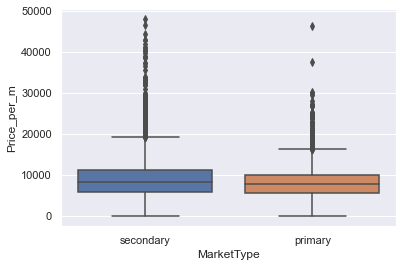

In [10]:
sns.boxplot(data = sales_offer_clean, x = 'MarketType', y = 'Price_per_m')

In [11]:
sales_offer_clean.pivot_table(index = 'MarketType', values = 'Price_per_m', aggfunc=['mean',np.std] )

,mean,std
,Price_per_m,Price_per_m
MarketType,,
primary,7573.752441,4599.237561
secondary,9174.126953,4598.486093


Overall The sedondary market is more expensive that primary.
The average price for 1 meter on primary market is **7 573PLN** and secondary is **9 174**

<AxesSubplot:xlabel='Region', ylabel='Price_per_m'>

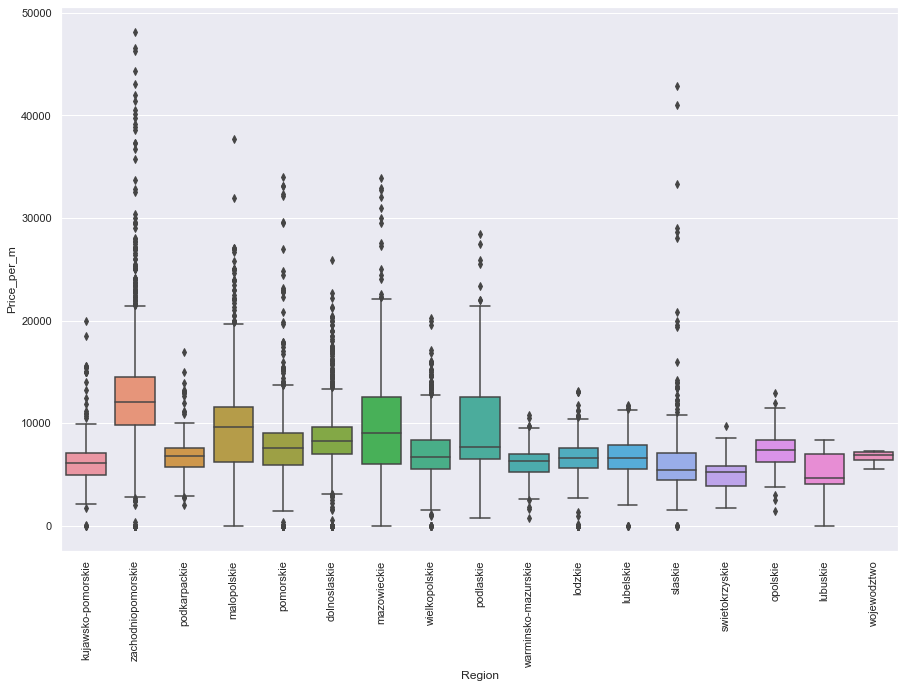

In [12]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(data = sales_offer_clean, x = 'Region', y = 'Price_per_m')

In [13]:
pivot = sales_offer_clean.pivot_table(index = ['Region','MarketType'], values = 'Price_per_m', aggfunc=['mean',np.median, np.std, 'count'] )
pivot

mean      median          std  \
                                 Price_per_m Price_per_m  Price_per_m   
Region              MarketType                                          
dolnoslaskie        primary      7068.990723      7892.0  4066.704511   
                    secondary    8813.726562      8562.0  2520.825574   
kujawsko-pomorskie  primary      7219.772949      6900.0  3221.200610   
                    secondary    6088.276855      5938.0  2184.987787   
lodzkie             primary      6079.571289      7005.0  3258.273028   
                    secondary    6541.530273      6411.0  1662.675929   
lubelskie           primary      6698.026855      6997.0  2510.864797   
                    secondary    6662.112793      6566.0  1772.626921   
lubuskie            primary      7277.799805      7451.0   534.164020   
                    secondary    4676.105469      4400.0  2040.958432   
malopolskie         primary      7352.215820      8890.5  6011.954223   
                    secondary   10362.473633     10182.0  3798.350785   
mazowieckie         primary      9448.190430      9012.0  4535.411091   
                    secondary    9362.676758      8984.5  5062.023350   
opolskie            primary      7005.563965      6600.0  1342.004428   
                    secondary    7479.090820      7765.5  2268.838034   
podkarpackie        primary      6996.234375      6750.0  1809.463460   
                    secondary    6948.486816      6784.0  2287.276527   
podlaskie           primary      7425.937500      7300.0  1425.709895   
                    secondary   10741.971680      7865.5  5920.910306   
pomorskie           primary      7757.888184      8100.0  3570.997814   
                    secondary    7946.451172      6799.5  4353.788654   
slaskie             primary      7448.779785      6126.0  5901.098660   
                    secondary    6750.664551      5440.0  5594.568905   
swietokrzyskie      primary      5730.057129      5678.0   585.253688   
                    secondary    4742.511719      4411.0  1578.213253   
warminsko-mazurskie primary      6738.307617      6950.0  1129.945364   
                    secondary    5748.213867      5714.0  1534.288899   
wielkopolskie       primary      7485.460449      6700.0  3102.861159   
                    secondary    7024.164551      6654.0  2429.234135   
wojewodztwo         primary      7334.000000      7334.0          NaN   
                    secondary    6447.333496      6721.0   808.038572   
zachodniopomorskie  primary      8506.000000      9675.0  6347.990695   
                    secondary   13416.697266     12735.0  4802.396832   

                                     count  
                               Price_per_m  
Region              MarketType              
dolnoslaskie        primary           1296  
                    secondary          967  
kujawsko-pomorskie  primary             88  
                    secondary          383  
lodzkie             primary            154  
                    secondary          345  
lubelskie           primary             75  
                    secondary          257  
lubuskie            primary              5  
                    secondary           19  
malopolskie         primary            838  
                    secondary          760  
mazowieckie         primary            488  
                    secondary          498  
opolskie            primary             39  
                    secondary           66  
podkarpackie        primary            192  
                    secondary          113  
podlaskie           primary             32  
                    secondary          140  
pomorskie           primary            412  
                    secondary          514  
slaskie             primary             50  
                    secondary          176  
swietokrzyskie      primary             35  
                    secondary           84  
warminsko-mazurskie primary      

In [16]:
bar_data = sales_offer_clean.pivot_table(index = ['Region', 'MarketType'], values = 'Price_per_m')
bar_data = bar_data.reset_index()

<AxesSubplot:xlabel='Region', ylabel='Price_per_m'>

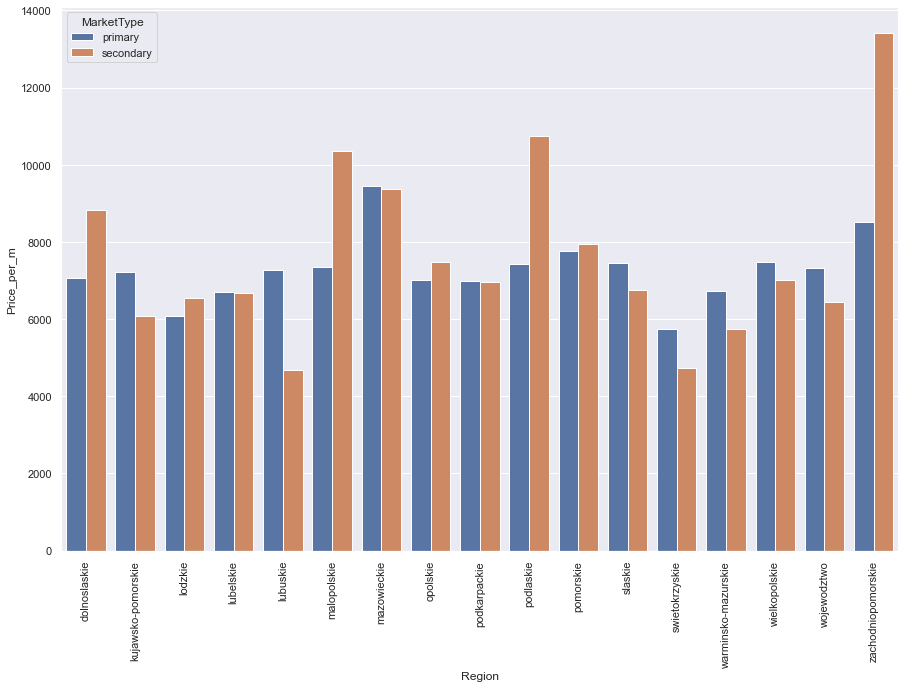

In [17]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(data=bar_data, x = 'Region', y = 'Price_per_m', hue = 'MarketType', )

By looking at regions, overall trend for secondary market being more expensive than primary one is visible in most the the regions. The most visible it is on Zachodnio-pomorskie, where average price per m is as high as **13 416**, that is  almost **5 000** more expensive than primary market and is twice as expensive as some of the regions like for example Lubuskie, that is the cheapest regions with prices being on average **4 676** on secondary market, that is really off the trend compared to other regions

I am interested in Dolnoslaskie Region so I will look right now into that region

In [18]:
sales_offer_clean.columns

Index(['Area', 'Build_year', 'Building_floors_num', 'Building_material',
       'Building_ownership', 'Building_type', 'City', 'Country',
       'Extras_types', 'Floor_no', 'Heating', 'MarketType', 'Media_types',
       'OfferType', 'Price_per_m', 'ProperType', 'Rooms_num', 'Subregion',
       'env', 'Offer_id', 'Offer_url', 'offer_type', 'Region'],
      dtype='object')

In [19]:
sales_offer_clean.Region.unique()

array(['kujawsko-pomorskie', 'zachodniopomorskie', 'podkarpackie',
       'malopolskie', 'pomorskie', 'dolnoslaskie', 'mazowieckie',
       'wielkopolskie', 'podlaskie', 'warminsko-mazurskie', 'lodzkie',
       nan, 'lubelskie', 'slaskie', 'swietokrzyskie', 'opolskie',
       'lubuskie', 'wojewodztwo'], dtype=object)

In [76]:
sales_offer_silesia = sales_offer_clean[sales_offer_clean['Region'] == 'dolnoslaskie']

In [77]:
sales_offer_silesia.describe()

,Area,Build_year,Building_floors_num,Floor_no,Price_per_m,Rooms_num,Offer_id
count,2263.000000,1890.000000,1752.000000,2239.000000,2263.000000,2261.000000,2.263000e+03
mean,56.814362,2002.415894,4.343037,2.285842,7814.531250,2.630694,6.214683e+07
std,21.358572,112.180626,2.748632,2.696526,3595.430908,0.974599,7.766855e+05
min,16.719999,1.000000,1.000000,-1.000000,0.000000,1.000000,3.394931e+07
25%,43.000000,2009.000000,3.000000,1.000000,7003.500000,2.000000,6.220905e+07
50%,53.540001,2021.000000,4.000000,2.000000,8235.000000,3.000000,6.228546e+07
75%,65.615002,2022.000000,5.000000,4.000000,9617.000000,3.000000,6.228897e+07
max,290.000000,2024.000000,18.000000,11.000000,25870.000000,8.000000,6.229464e+07


most of the offers are coming from the biggest subregions so I will dropp all that have less than 100 offers, to make analysis more clear

In [81]:
subregion_scope = sales_offer_silesia.Subregion.value_counts() > 100
subregion_scope = list(subregion_scope[subregion_scope].index)
bool_con = sales_offer_silesia.Subregion.isin(subregion_scope)

In [85]:
sales_offer_silesia = sales_offer_silesia[bool_con]

In [86]:
sales_offer_silesia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 12 to 12106
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 2135 non-null   float32
 1   Build_year           1801 non-null   float32
 2   Building_floors_num  1638 non-null   float32
 3   Building_material    636 non-null    object 
 4   Building_ownership   1085 non-null   object 
 5   Building_type        1414 non-null   object 
 6   City                 2135 non-null   object 
 7   Country              2135 non-null   object 
 8   Extras_types         1909 non-null   object 
 9   Floor_no             2112 non-null   float64
 10  Heating              1113 non-null   object 
 11  MarketType           2135 non-null   object 
 12  Media_types          863 non-null    object 
 13  OfferType            2135 non-null   object 
 14  Price_per_m          2135 non-null   float32
 15  ProperType           2135 non-null  

In [115]:
sales_offer_silesia.pivot_table(values = ['Area', 'Price_per_m'], index = ['City', 'MarketType', 'Building_type'])

Area   Price_per_m
City          MarketType Building_type                          
Bielany       secondary  ribbon          75.120003   9571.000000
Groblice      secondary  block           55.799999   7460.000000
Iwiny         secondary  ribbon         113.000000   6991.000000
Kamieniec     secondary  tenement       134.000000   5216.000000
Katy          secondary  tenement       160.000000   5250.000000
Kielczow      primary    apartment       66.000000   6045.000000
                         block           65.300003   5972.000000
                         ribbon          60.180000   5479.000000
              secondary  house           61.000000   8344.000000
Krzeptow      secondary  block           71.000000   7000.000000
Lublin        primary    apartment       53.174999   9211.875000
                         block           55.802940   7622.441406
                         house          108.120003   5086.000000
              secondary  apartment       77.440002   9501.666992
                         block           53.632896   8102.401855
                         house           48.000000  11146.000000
                         tenement        53.973000   7703.200195
Medlow        secondary  block           98.449997   5383.000000
Mokronos      secondary  tenement        51.799999   3378.000000
Nadolice      primary    house           80.184998   6541.000000
Pietrzykowice secondary  tenement        70.900002   5924.000000
Poznan        primary    apartment       55.160625   8889.000000
                         block           47.406288   7942.801758
                         house           76.000000   7605.000000
                         tenement        47.264999   9877.500000
              secondary  apartment       65.265198  10521.559570
                         block           51.343899   8775.962891
                         house           89.730003   8137.000000
                         infill          67.625000   8622.000000
                         loft           111.000000  13874.000000
                         ribbon          72.900002   8929.000000
                         tenement        62.915123   8425.439453
Radwanice     secondary  ribbon          75.000000   9320.000000
Siechnice     primary    apartment       45.026669   6733.333496
                         block           56.695000   6960.700195
                         house          118.150002   4223.000000
              secondary  block           57.320000   8573.286133
                         ribbon          88.000000   6705.000000
                         tenement        69.089996   5630.000000
Smolec        secondary  block           54.155998   7672.000000
                         house          150.000000   7260.000000
Sobotka       primary    apartment      100.550003   6753.000000
                         block           81.000000   5198.000000
Swieta        primary    block           71.750000   6400.000000
              secondary  block           63.590000   9262.000000
Wilczyce      secondary  ribbon          80.000000   8738.000000
Wroclaw       primary    apartment       58.575947  11007.279297
                         block           49.693432   9293.450195
                         house          102.666664   8400.000000
                         tenement        38.364998  15469.666992
              secondary  apartment       61.176250  11446.946289
                         block           55.560677   9253.784180
                         house           75.610001   9178.333008
                         infill          68.326248  11135.125000
                         ribbon          59.200001   9739.599609
                         tenement        63.260731   9010.687500
Wysoka        secondary  block           67.313332   8873.000000
Zacharzyce    primary    block           55.176666   6566.666504

In [117]:
sales_offer_silesia[sales_offer_silesia['City'] == 'Wroclaw'].describe()

,Area,Build_year,Building_floors_num,Floor_no,Price_per_m,Rooms_num,Offer_id
count,1018.000000,816.000000,894.00000,1003.000000,1018.000000,1017.000000,1.018000e+03
mean,56.560600,2000.802734,4.43736,2.170489,9672.593750,2.611603,6.215407e+07
std,21.673725,94.540283,2.45314,2.334298,2245.869629,1.010571,9.650684e+05
min,16.719999,170.000000,1.00000,-1.000000,4593.000000,1.000000,3.394931e+07
25%,41.190000,2000.000000,3.00000,1.000000,8239.500000,2.000000,6.223371e+07
50%,53.775000,2021.000000,4.00000,2.000000,9262.000000,3.000000,6.228529e+07
75%,66.827501,2021.000000,5.00000,4.000000,10500.000000,3.000000,6.229086e+07
max,290.000000,2024.000000,17.00000,11.000000,22703.000000,8.000000,6.229462e+07


In [123]:
sales_offer_silesia[sales_offer_silesia['City'] == 'Wroclaw'].sort_values(by = 'Price_per_m').iloc[:,:-2].head()

,Area,Build_year,Building_floors_num,Building_material,Building_ownership,Building_type,City,Country,Extras_types,Floor_no,...,MarketType,Media_types,OfferType,Price_per_m,ProperType,Rooms_num,Subregion,env,Offer_id,Offer_url
2925,104.500000,1930.0,5.0,NaN,NaN,NaN,Wroclaw,Polska,basement,5.0,...,secondary,NaN,sprzedaz,4593.0,,5.0,wroclaw,production,61995547,/pl/oferta/duze-mieszkanie-przy-ulicy-jednosci...
5758,102.599998,NaN,2.0,NaN,NaN,block,Wroclaw,Polska,garage,2.0,...,primary,NaN,sprzedaz,5670.0,,6.0,wroclaw,production,62294588,/pl/oferta/przestronna-kawalerka-kameralne-osi...
4461,104.300003,NaN,1.0,brick,full ownership,tenement,Wroclaw,Polska,"basement, garden",1.0,...,secondary,"cable-television, internet",sprzedaz,5705.0,,4.0,wroclaw,production,62290461,/pl/oferta/mieszkanie-w-zielonym-urokliwym-mie...
3480,62.869999,1914.0,2.0,brick,full ownership,tenement,Wroclaw,Polska,separate kitchen,2.0,...,secondary,NaN,sprzedaz,5726.0,,3.0,wroclaw,production,61930342,/pl/oferta/okazja-mieszkanie-w-centrum-miasta-...
2692,65.620003,1903.0,3.0,brick,full ownership,tenement,Wroclaw,Polska,basement,2.0,...,secondary,"cable-television, internet, phone",sprzedaz,5928.0,,2.0,wroclaw,production,61828954,/pl/oferta/mieszkanie-2-pokoje-w-kamienicy-z-p...
